<a href="https://colab.research.google.com/github/fatemehes75/Classification_problems/blob/main/Predict_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

W have a customer dataset where each row represents one customer. The dataset provides information to help you predict what behavior. We can analyze all relevant customer data to develop customer retention programs.

The dataset features : tenure	, age, address, income , ...

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("ChurnData.csv")
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [6]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
print(x[0:5])
print(y[0:5])

[[1.10000e+01 3.30000e+01 7.00000e+00 1.36000e+02 5.00000e+00 5.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 4.40000e+00 2.07500e+01 0.00000e+00
  1.52500e+01 3.57000e+01 4.20000e+01 2.11450e+02 1.25000e+02 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.48200e+00
  3.03300e+00 4.91300e+00 4.00000e+00]
 [3.30000e+01 3.30000e+01 1.20000e+01 3.30000e+01 2.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 9.45000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 2.88800e+02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.24600e+00
  3.24000e+00 3.49700e+00 1.00000e+00]
 [2.30000e+01 3.00000e+01 9.00000e+00 3.00000e+01 1.00000e+00 2.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 6.30000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.57050e+02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.84100e+00
  3.24000e+00 3.40100e+00 3.00000e

In [8]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.5565779 ,
        -0.84846321, -0.80905935, -0.97385292, -0.5661

In [15]:
#split train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [16]:
#train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
Predicted_y = LR.predict(x_test)
Predicted_y

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0.])

In [26]:
#function for plotting confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicted')
print(confusion_matrix(y_test, Predicted_y, labels=[1,0]))

[[ 6  3]
 [ 6 25]]


Normalized confusion matrix
[[0.67 0.33]
 [0.19 0.81]]


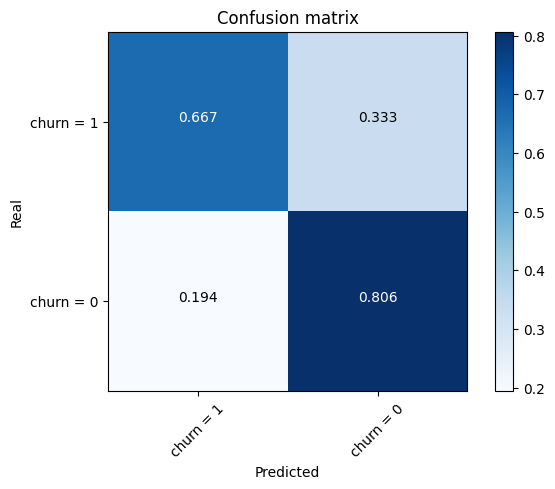

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Predicted_y, labels=[1,0])
np.set_printoptions(precision=2)

# Plotconfusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes =['churn = 1','churn = 0'],normalize= True,  title='Confusion matrix')

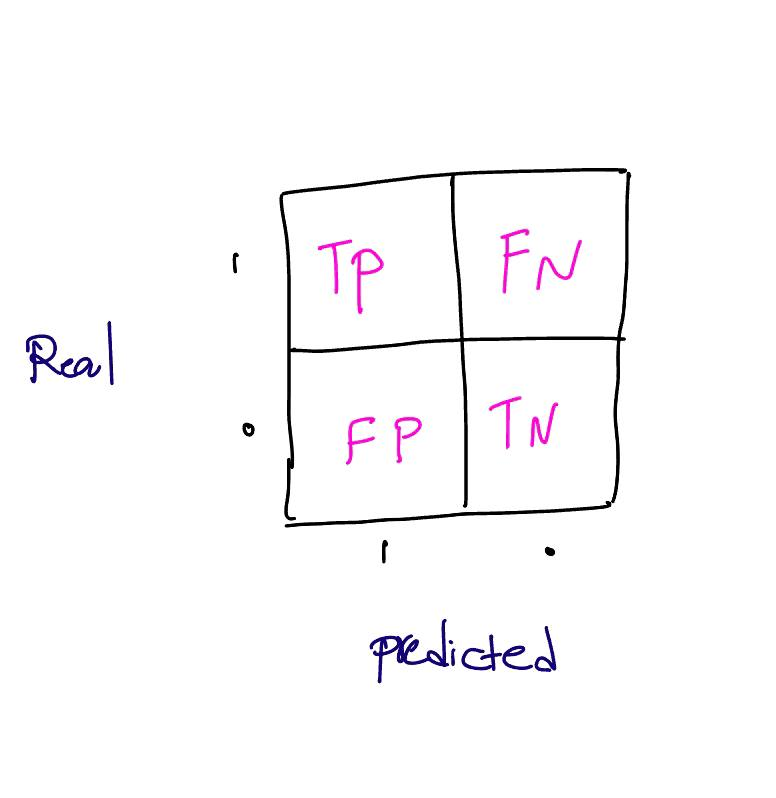